# imports

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

from sklearn.model_selection import train_test_split
from skimage import feature
from sklearn.metrics import confusion_matrix

from random import randint

%matplotlib inline

# Load data

In [2]:
letter_images=pd.read_csv("emnist-letters-train.csv")

In [3]:
letter_images.iloc[:,0]=letter_images.iloc[:,0]-1
letter_images.iloc[:,0].min(),letter_images.iloc[:,0].max()

(0, 25)

In [4]:
X=letter_images.iloc[:,1:].values
y=letter_images.iloc[:,0].values

In [5]:
X.shape,y.shape

((88799, 784), (88799,))

# split data

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42,stratify=y,shuffle=True)

In [7]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((71039, 784), (71039,), (17760, 784), (17760,))

# extract features

In [8]:
train_feature=[]
test_feature=[]

for train_img in X_train:
    train_img=train_img.reshape((28,28))
    
    hog_train_img,_=feature.hog(train_img,visualize=True)
    train_feature.append(hog_train_img)
    
for test_img in X_test:
    test_img=test_img.reshape((28,28))
    
    hog_test_img,_=feature.hog(test_img,visualize=True)
    test_feature.append(hog_test_img)
    

# example

Text(0.5, 1.0, 'hog image')

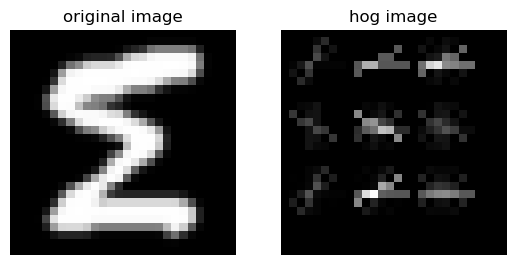

In [9]:
gray_image=X_train[0].reshape((28,28))

hog_feature,hog_img= feature.hog(gray_image,visualize=True)

plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(gray_image,cmap="gray")
plt.title("original image")

plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(hog_img,cmap="gray")
plt.title("hog image")

In [10]:
X_train_img=np.array(train_feature)
X_test_img=np.array(test_feature)

In [11]:
X_train_img.shape,X_test_img.shape,y_train.shape,y_test.shape

((71039, 81), (17760, 81), (71039,), (17760,))

# Model

In [12]:
model= Sequential([
    tf.keras.Input(shape=(81,)),
    Dense(units=128,activation="relu",name="layer1"),
    Dense(units=128,activation="relu",name="layer2"),
    Dense(units=26,activation="linear",name="layer3")
],name="Mymodel"
)

# Model summary

In [13]:
model.summary()

Model: "Mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 128)               10496     
                                                                 
 layer2 (Dense)              (None, 128)               16512     
                                                                 
 layer3 (Dense)              (None, 26)                3354      
                                                                 
Total params: 30362 (118.60 KB)
Trainable params: 30362 (118.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# shape of parameters

In [14]:
[layer1,layer2,layer3]=model.layers

In [15]:
w1,b1=layer1.get_weights()
w2,b2=layer2.get_weights()

w3,b3=layer3.get_weights()

print(f"w1 shape:{w1.shape} , b1 shape: {b1.shape}")
print(f"w2 shape:{w2.shape} , b2 shape: {b2.shape}")
print(f"w3 shape:{w3.shape} , b3 shape: {b3.shape}")

w1 shape:(81, 128) , b1 shape: (128,)
w2 shape:(128, 128) , b2 shape: (128,)
w3 shape:(128, 26) , b3 shape: (26,)


# compiling (loss function)

In [16]:
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

In [17]:
Letter_recognition=model.fit(
    X_train_img,y_train,
    epochs=100
)

Epoch 1/100


2220/2220 [==============================] - 9s 3ms/step - loss: 0.9207 - accuracy: 0.7199
Epoch 2/100
2220/2220 [==============================] - 7s 3ms/step - loss: 0.5497 - accuracy: 0.8244
Epoch 3/100
2220/2220 [==============================] - 7s 3ms/step - loss: 0.4614 - accuracy: 0.8487
Epoch 4/100
2220/2220 [==============================] - 7s 3ms/step - loss: 0.4095 - accuracy: 0.8647
Epoch 5/100
2220/2220 [==============================] - 7s 3ms/step - loss: 0.3772 - accuracy: 0.8743
Epoch 6/100
2220/2220 [==============================] - 7s 3ms/step - loss: 0.3526 - accuracy: 0.8813
Epoch 7/100
2220/2220 [==============================] - 7s 3ms/step - loss: 0.3318 - accuracy: 0.8873
Epoch 8/100
2220/2220 [==============================] - 7s 3ms/step - loss: 0.3158 - accuracy: 0.8924
Epoch 9/100
2220/2220 [==============================] - 7s 3ms/step - loss: 0.3011 - accuracy: 0.8985
Epoch 10/100
2220/2220 [==============================] - 7s 3ms/step -

2220/2220 [==============================] - 8s 3ms/step - loss: 0.0625 - accuracy: 0.9739
Epoch 76/100
2220/2220 [==============================] - 7s 3ms/step - loss: 0.0623 - accuracy: 0.9736
Epoch 77/100
2220/2220 [==============================] - 7s 3ms/step - loss: 0.0619 - accuracy: 0.9741
Epoch 78/100
2220/2220 [==============================] - 7s 3ms/step - loss: 0.0600 - accuracy: 0.9755
Epoch 79/100
2220/2220 [==============================] - 7s 3ms/step - loss: 0.0603 - accuracy: 0.9752
Epoch 80/100
2220/2220 [==============================] - 7s 3ms/step - loss: 0.0576 - accuracy: 0.9754
Epoch 81/100
2220/2220 [==============================] - 6s 3ms/step - loss: 0.0580 - accuracy: 0.9753
Epoch 82/100
2220/2220 [==============================] - 7s 3ms/step - loss: 0.0578 - accuracy: 0.9757
Epoch 83/100
2220/2220 [==============================] - 7s 3ms/step - loss: 0.0561 - accuracy: 0.9766
Epoch 84/100
2220/2220 [==============================] - 7s 3ms/step - loss:

# make prediction

In [18]:
prediction_model=model.predict(X_test_img)

555/555 [==============================] - 2s 2ms/step


In [19]:
prediction_p=tf.nn.softmax(prediction_model)

In [20]:
prediction_lable=np.argmax(prediction_p,axis=1)

In [21]:
print(prediction_lable)
print(y_test)

[ 5  5 12 ... 19 16 11]
[19  5 12 ... 19 17 11]


# accuracy

In [22]:
loss,accurecy=model.evaluate(X_test_img,y_test)

555/555 [==============================] - 2s 3ms/step - loss: 0.8812 - accuracy: 0.8770


In [23]:
accurecy

0.8769707083702087

# Vesualize random data

In [24]:
def determine_letter(prediction):
    letters={i: chr(ord('A') + i) for i in range(26)}
    
    return letters[prediction]

1/1 [==============================] - 0s 45ms/step


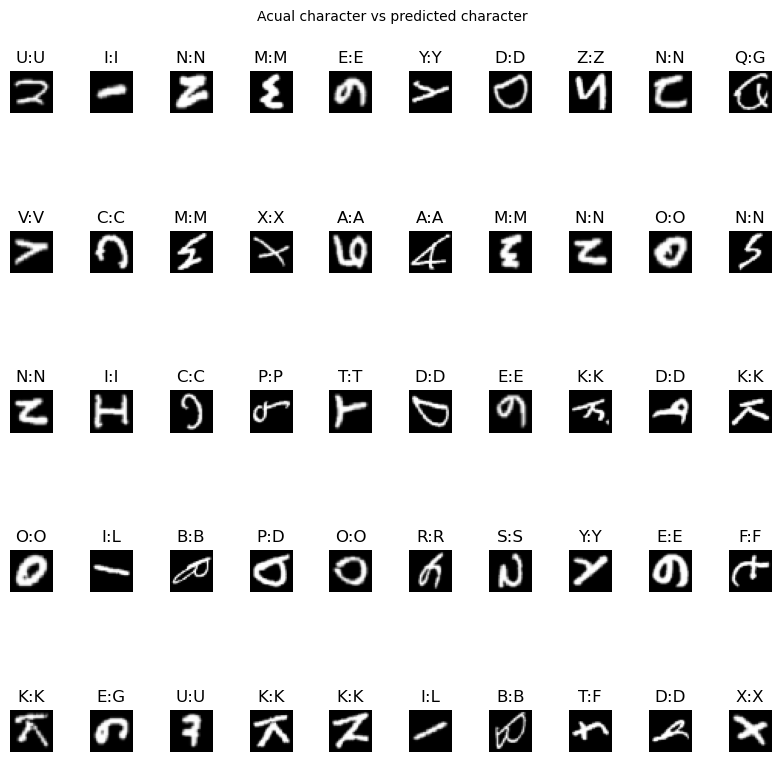

In [34]:
fig, axes = plt.subplots(5,10, figsize=(8,8))
fig.tight_layout(pad=0.1)
fig.text(0.35,1,"Acual character vs predicted character")

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(0,17000)
    
    X_random_reshaped = X_test_img[random_index].reshape((1,81))

    ax.imshow(X_test[random_index].reshape((28,28)), cmap='gray')
    
    predected_label=model.predict([X_random_reshaped])
    
    predected_label_p=tf.nn.softmax(predected_label)
    
    predictedLabel=np.argmax(predected_label_p)
    
    actual_character=determine_letter(y_test[random_index])
    
    predicted_character=determine_letter(predictedLabel)
    
    ax.set_title(f"{actual_character}:{predicted_character}")
    ax.set_axis_off()

# Save model

In [26]:
model.save('D:/Ai model/model1')

INFO:tensorflow:Assets written to: D:/Ai model/model1\assets


INFO:tensorflow:Assets written to: D:/Ai model/model1\assets


In [28]:
from sklearn.metrics import confusion_matrix

In [32]:
confusion_matrix(prediction_lable,y_test)

array([[579,  14,   2,   9,   3,   0,  15,   9,   4,   5,   2,   0,   6,
         17,   1,   1,  27,   2,   1,   1,   6,   0,   3,   1,   1,   1],
       [  6, 584,   2,   4,   5,   4,  14,  25,   2,   0,   5,   5,   0,
          0,   7,   4,   8,  11,   8,   3,   1,   0,   0,   1,   0,   2],
       [  3,   0, 609,   0,  25,   0,   6,   0,   0,   0,   0,   3,   0,
          1,   3,   1,   2,   4,   1,   0,   1,   0,   0,   0,   0,   0],
       [  7,   6,   0, 635,   0,   0,   0,   7,   4,  11,   0,   4,   1,
          4,  24,  10,   3,   0,   1,   2,   1,   0,   2,   1,   0,   0],
       [  7,   7,  32,   0, 619,  10,   9,   0,   0,   0,   1,   0,   0,
          0,   2,   2,   4,   2,   5,   2,   0,   1,   2,   3,   0,   2],
       [  1,   1,   2,   1,   7, 608,   1,   0,   3,   3,   3,   2,   0,
          0,   0,   8,   1,  17,   2,  14,   0,   0,   0,   1,   0,   1],
       [ 25,  11,  18,   2,   6,  10, 532,   1,   1,   1,   0,   0,   2,
          4,   3,   3, 101,   4,   6,   0,   